In [ ]:
!pip install tqdm==4.64.1 pandas==2.0.0 datasets==2.11.0 pandarallel==1.6.4 matplotlib==3.7.1 seaborn==0.12.2 transformers==4.28.0

In [1]:
import os

import pandas as pd
import seaborn as sns
from datasets import load_dataset
from matplotlib import pyplot as plt
from transformers import AutoTokenizer
from tqdm.notebook import tqdm
from pandarallel import pandarallel

sns.set()
pandarallel.initialize(progress_bar=True, nb_workers=os.cpu_count())

%matplotlib inline

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


INFO: Pandarallel will run on 32 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
duped_dataset = load_dataset('EleutherAI/pile-duped-pythia-random-sampled')
duped_train_df = duped_dataset['train'].to_pandas()

Found cached dataset parquet (/home/alvin/.cache/huggingface/datasets/EleutherAI___parquet/EleutherAI--pile-duped-pythia-random-sampled-6110a299bf16f914/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
duped_train_df.head()

,tokens,is_memorized,index
0,"[7742, 13, 253, 2317, 3798, 310, 6898, 387, 18...",False,12
1,"[5962, 1318, 275, 465, 13, 337, 13, 259, 32, 1...",False,30
2,"[4122, 14900, 2074, 8898, 9532, 15, 2053, 2590...",False,75
3,"[13, 390, 310, 1512, 1711, 281, 320, 7607, 285...",False,81
4,"[2014, 577, 89, 21, 313, 1237, 14, 6443, 10, 1...",False,85


In [4]:
duped_train_df.shape

(5000000, 3)

In [5]:
duped_train_df.groupby('is_memorized').agg({'tokens': 'count'})

,tokens
is_memorized,
False,4905081
True,94919


## Memorized Samples from Duplicated Train Dataset

In [6]:
duped_memorized_df = duped_train_df[duped_train_df.is_memorized == True]
duped_memorized_df['tokens_index_concat'] = duped_memorized_df['tokens'].parallel_apply(lambda t: '_'.join([f'{v}' for v in t]))

/tmp/ipykernel_1505/285177830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duped_memorized_df['tokens_index_concat'] = duped_memorized_df['tokens'].parallel_apply(lambda t: '_'.join([f'{v}' for v in t]))


In [7]:
duped_memorized_sequence_freq_df = duped_memorized_df.groupby('tokens_index_concat').agg({'index': 'nunique'}).reset_index()

In [8]:
duped_memorized_sequence_freq_df.sort_values('index', ascending=False)

,tokens_index_concat,index
55080,36038_36038_36038_36038_36038_36038_36038_3603...,8
19377,177_177_177_177_177_177_177_177_177_177_177_17...,5
4499,11927_11927_11927_11927_11927_11927_11927_1192...,4
39956,2642_81_2642_81_2642_81_2642_81_2642_81_2642_8...,3
4773,11_67_11_67_11_67_11_67_11_67_11_67_11_67_11_6...,3
...,...,...
31629,20585_7169_13_1959_273_4179_13_281_667_1436_13...,1
31628,20585_7169_13_1959_273_4179_13_281_667_1436_13...,1
31627,20585_7169_13_1959_273_4179_13_281_667_1436_13...,1
31626,20585_7169_13_1959_273_4179_13_281_667_1436_13...,1


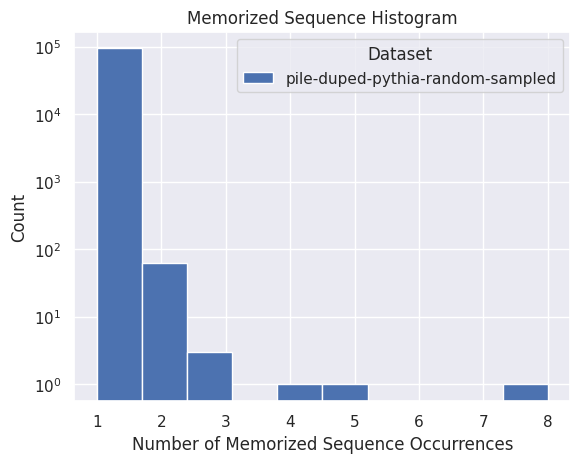

In [9]:
duped_memorized_sequence_freq_df['index'].hist()
plt.title('Memorized Sequence Histogram')
plt.ylabel('Count')
plt.xlabel('Number of Memorized Sequence Occurrences')
plt.yscale('log')
plt.legend(['pile-duped-pythia-random-sampled'], title='Dataset')

In [16]:
duplicated_memorized_sequences = duped_memorized_sequence_freq_df[duped_memorized_sequence_freq_df['index'] > 1]
duped_num_repeated = duplicated_memorized_sequences.shape[0]
duped_num_non_repeated = duped_memorized_sequence_freq_df.shape[0] - duped_num_repeated

print(duped_num_repeated, duped_num_non_repeated)

69 94767


In [11]:
tokenizer = AutoTokenizer.from_pretrained(
  'EleutherAI/pythia-70m-deduped',
  revision='step3000',
)

for _, row in duplicated_memorized_sequences.sort_values('index', ascending=False).iterrows():
    frequency = row['index']
    token_indices = list(map(lambda v: int(v), row.tokens_index_concat.split('_')))
    repeated_sequence = tokenizer.decode(token_indices)
    
    print(f'Repeated Sequence with frequency of {frequency}')
    print('=================================================')
    print(repeated_sequence)
    print('=================================================')
    print()

Repeated Sequence with frequency of 8
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\